In [1]:
import random
import pandas as pd
import numpy as np

In [6]:
# add missing value in random position
random.seed(9001)
values = list(set([random.randint(0,len(data)) for p in range(0,100)]))
for var in ['Pickup Date','Job Category','Customer Email']:
    data.loc[values,var] = np.nan
    
data.isnull().sum()

Pickup Date             266
Customer Name            66
Customer Email          441
Customer Notes        23250
Address                 166
Latitude               1814
Longitude              1814
Contact Name            170
Contact Phone          1354
Driver                  553
Warehouse Location    13506
Job Description        1874
Job #                   215
Job Category           2575
Unnamed: 14           28188
Unnamed: 15           28188
Unnamed: 16           28188
Unnamed: 17           28188
Unnamed: 18           28188
Unnamed: 19           28188
Unnamed: 20           28188
Unnamed: 21           28190
Unnamed: 22           28188
Unnamed: 23           28188
Unnamed: 24           28188
dtype: int64

In [15]:
# Check the Categorical value in dataset
cat_col = [c for c in data.columns if data[c].dtypes=='O']
data[cat_col].head(2)


,Pickup Date,Customer Name,Customer Email,Customer Notes,Address,Contact Name,Contact Phone,Driver,Warehouse Location,Job Description,Job #,Job Category,Unnamed: 14,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 24
0,10/2/2018 9:00,Emerge180,lchristopherson@emerge180.com,NaN,"13902 N Dale Mabry Hwy Suite 229, Tampa",Lee Christopherson,NaN,Unassigned Jobs,NaN,18 CPU's,286,COMMERCIAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/2/2018 10:00,Deliver Media,Mike.rumore@delivermedia.com,NaN,"3903 Northdale Blvd #280Tampa, Tampa, FL 33624",Mike Rumore,8632791383,Unassigned Jobs,NaN,15 desktops,289,COMMERCIAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Numerical Columns
num_cols = [c for c in data.columns if data[c].dtypes != 'O']
data[num_cols].head()

,Latitude,Longitude,Unnamed: 15,Unnamed: 16,Unnamed: 23
0,28.072789,-82.507805,NaN,NaN,NaN
1,28.095117,-82.507505,NaN,NaN,NaN
2,27.966524,-82.567540,NaN,NaN,NaN
3,28.041956,-82.663466,NaN,NaN,NaN
4,27.952094,-82.462287,NaN,NaN,NaN


In [19]:
# Types of Variable
  # Continous Variable
data['Latitude'].unique()

array([28.0727885, 28.0951173, 27.9665242, ..., 27.7224165, 27.9393402,
       28.0241287])

Text(0, 0.5, 'Lenght of Height')

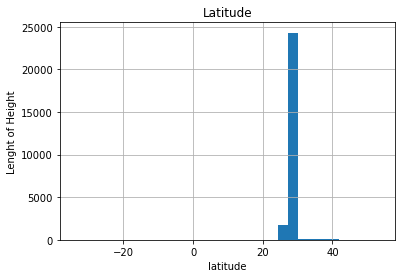

In [20]:
fig = data['Latitude'].hist(bins=30)
fig.set_title('Latitude')
fig.set_xlabel('latitude')
fig.set_ylabel('Lenght of Height')

In [21]:
# Categorical Variable
data['Warehouse Location'].unique()

array([nan, 'Tampa', 'Orlando', 'Bradenton'], dtype=object)

Text(0, 0.5, 'No of WareHouse Location')

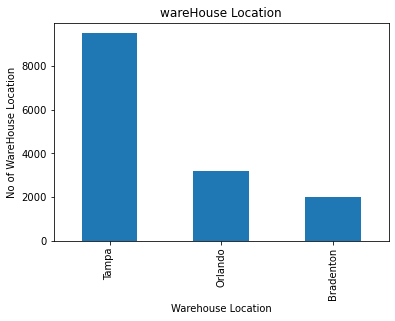

In [22]:
fig = data['Warehouse Location'].value_counts().plot.bar()
fig.set_title('wareHouse Location')
fig.set_ylabel('No of WareHouse Location')

In [23]:
data['Warehouse Location'].value_counts()

Warehouse Location
Tampa        9512
Orlando      3172
Bradenton    2003
Name: count, dtype: int64

In [28]:
data['Customer Email'].unique()

array(['lchristopherson@emerge180.com', 'Mike.rumore@delivermedia.com',
       'rcook@greatlakesadvisors.com', ..., 'bagramonte@amuni.com',
       'kzolis@uspi.com', 'Johanna.Cadena@PlantResponse.com'],
      dtype=object)

In [35]:
# Working with DateTime
data['Pickup Date'].dtypes

dtype('O')

In [38]:
# change to datetime format
data['Pick Up'] = pd.to_datetime(data['Pickup Date'])
data[['Pickup Date','Pick Up']].head(5)

,Pickup Date,Pick Up
0,10/2/2018 9:00,2018-10-02 09:00:00
1,10/2/2018 10:00,2018-10-02 10:00:00
2,10/2/2018 10:30,2018-10-02 10:30:00
3,10/2/2018 9:00,2018-10-02 09:00:00
4,10/2/2018 11:00,2018-10-02 11:00:00


In [41]:
data['Month'] = data['Pick Up'].dt.month
data['Year'] = data['Pick Up'].dt.year

In [42]:
data['Job Description'].unique()

array(["18 CPU's", '15 desktops',
       '6 Desktops - 1 server - one monitor - external hard drives', ...,
       'Pickup 1 missile and leave 2',
       'batteries; laptop; old routers; computer tower and cables - see photo',
       '18 laptops; 12 small towers; 2 VOIP box; 40+ desk phones'],
      dtype=object)

In [43]:
# Create new columns for numerical and string parts
data['Quantity'] = data['Job Description'].str.extract(r'(\d+)').astype(float)
data['Product Name'] = data['Job Description'].str.replace(r'\d+', '')


In [44]:
data[['Quantity','Product Name']].head(5)

,Quantity,Product Name
0,18.0,18 CPU's
1,15.0,15 desktops
2,6.0,6 Desktops - 1 server - one monitor - external...
3,NaN,Misc
4,NaN,Chairs; television; file cabinet


In [33]:
data = pd.read_csv('Job History Export_New.csv')
data.columns

Index(['Pickup Date', 'Customer Name', 'Customer Email', 'Customer Notes',
       'Address', 'Latitude', 'Longitude', 'Contact Name', 'Contact Phone',
       'Driver', 'Warehouse Location', 'Job Description', 'Job #',
       'Job Category', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [53]:
#Missing Data
# Let's load 
data = pd.read_csv('Job History Export_New.csv')
data.columns

Index(['Pickup Date', 'Customer Name', 'Customer Email', 'Customer Notes',
       'Address', 'Latitude', 'Longitude', 'Contact Name', 'Contact Phone',
       'Driver', 'Warehouse Location', 'Job Description', 'Job #',
       'Job Category', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [54]:
data.isnull().sum()

Pickup Date             166
Customer Name            66
Customer Email          341
Customer Notes        23250
Address                 166
Latitude               1814
Longitude              1814
Contact Name            170
Contact Phone          1354
Driver                  553
Warehouse Location    13506
Job Description        1874
Job #                   215
Job Category           2482
Unnamed: 14           28188
Unnamed: 15           28188
Unnamed: 16           28188
Unnamed: 17           28188
Unnamed: 18           28188
Unnamed: 19           28188
Unnamed: 20           28188
Unnamed: 21           28190
Unnamed: 22           28188
Unnamed: 23           28188
Unnamed: 24           28188
dtype: int64

In [55]:
#put missing value with binary variable
data['Warehouse Location'] = np.where(data['Warehouse Location'].isnull(),1,0)

In [56]:
data['Warehouse Location'].isnull().sum()

0

In [59]:
data.groupby(['Latitude'])['Longitude'].mean().head(5)

Latitude
-33.826265    151.200602
 18.034964    -66.849898
 18.060658     73.359080
 24.556043    -81.790578
 24.880667    -80.693837
Name: Longitude, dtype: float64

### Outlier Labels

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# dataset for the demo
from sklearn.datasets import fetch_california_housing

In [68]:
# load the California House price data from Scikit-learn
X, Y = fetch_california_housing(return_X_y=True, as_frame=True)

# Remove lat and lon
X.drop(["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [69]:


# I will transform the variables for the demo.

X['MedInc'] = np.log(X['MedInc'])
X["AveRooms"] = 1 / X["AveRooms"]
X["AveBedrms"] = 1 / X["AveBedrms"]
X["AveOccup"] = 1 / X["AveOccup"]
X['Population'] = np.log(X['Population'])



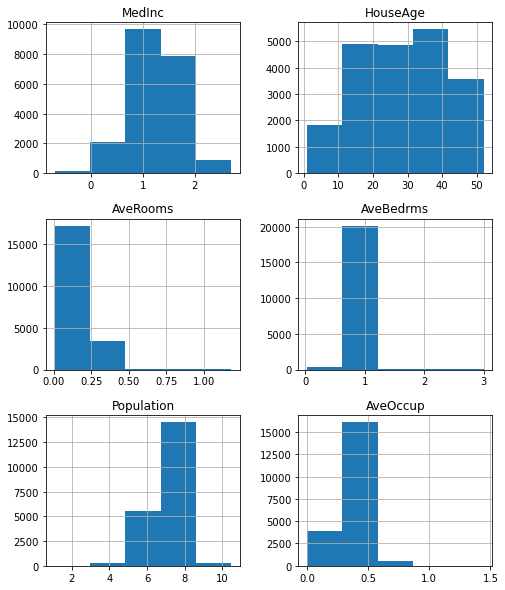

In [70]:
#Plot Variable Distributions:
X.hist(bins=5,figsize=(8,10))
plt.show()

In [71]:
def diagnostic_plots(df, variable):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

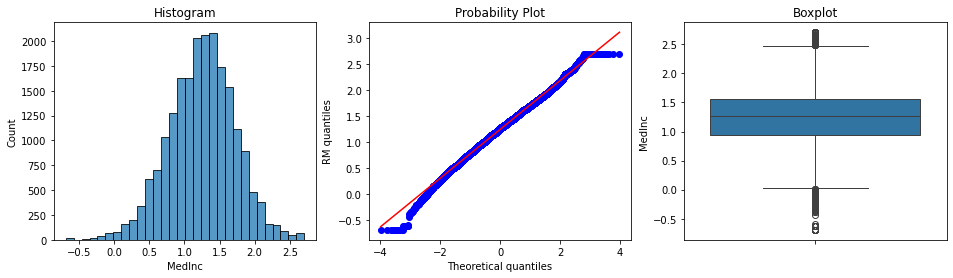

In [72]:
# Let's plot some of the variables

diagnostic_plots(X, 'MedInc')

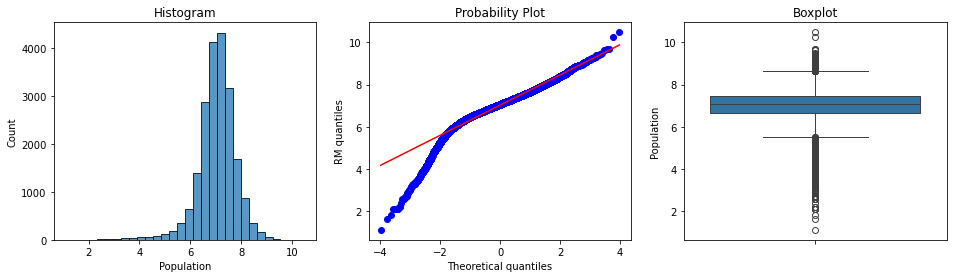

In [73]:
# Let's plot some of the variables

diagnostic_plots(X, 'Population')

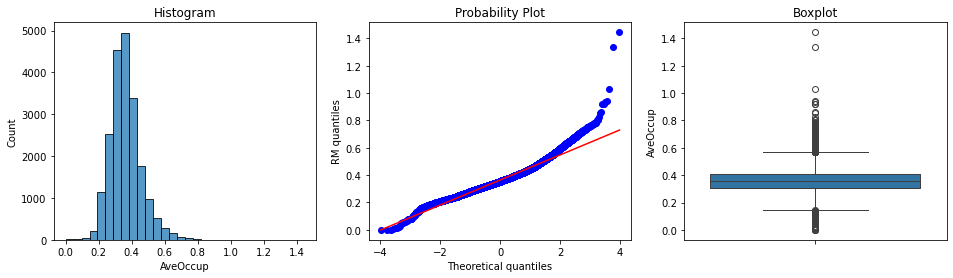

In [74]:
# Let's plot some of the variables

diagnostic_plots(X, 'AveOccup')

### Linear Model

In [77]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q Plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing
# for linear Regression
from sklearn.linear_model import LinearRegression

#to split standardize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate the regression model
from sklearn.metrics import mean_squared_error

In [80]:
#load the california House Price data
X , y = fetch_california_housing(return_X_y=True,as_frame=True)
#Remove lat and ln
X.drop(['Latitude','Longitude'],axis=1,inplace=True)

# display top 5 
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


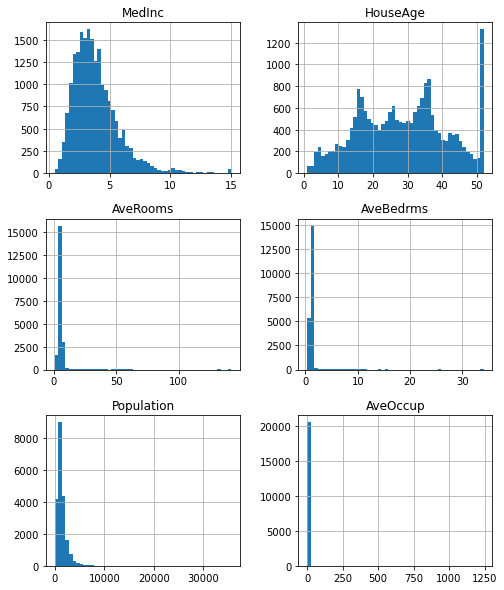

In [81]:
# Plot initial Variable distrubutino
X.hist(bins=50,figsize=(8,10))
plt.show()

In [82]:
# To train and evaluate a model, let's first split the data into
# train and test data:

X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((14448, 6), (6192, 6), (14448,), (6192,))

In [83]:
# # Let's scale the features.
# This is a normal procedure for linear models.
# I will explain this later in the course.
scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [85]:
# Train the models
linreg = LinearRegression()
linreg.fit(scaler.transform(X_train),y_train)

# Make Prediction on train set and calculate the MSE
print('Train Ser')
pred = linreg.predict(scaler.transform(X_train))
print("LInearRegression mse:{}".format(mean_squared_error))

#Make Pre

Train Ser
LInearRegression mse:<function mean_squared_error at 0x7f994ee5d2d0>
